In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target 

In [22]:
y_categorical = to_categorical(y, num_classes = 3)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42) 

In [23]:
model = Sequential([
   #capa entrada
    Dense(10, activation='relu', input_shape=(4,)),
    #capa oculta1
    Dense(8, activation='relu'),
    #capa oculta2
    Dense(6, activation='relu'),
    #capa sortida
    Dense(3, activation='softmax')
])

print(model.summary())

c:\Users\paula\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.3333 - loss: 1.0653 - val_accuracy: 0.4000 - val_loss: 1.0299
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4917 - loss: 1.0196 - val_accuracy: 0.7000 - val_loss: 0.9998
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6583 - loss: 0.9925 - val_accuracy: 0.7000 - val_loss: 0.9871
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6500 - loss: 0.9821 - val_accuracy: 0.7000 - val_loss: 0.9840
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6500 - loss: 0.9779 - val_accuracy: 0.7000 - val_loss: 0.9745
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6500 - loss: 0.9651 - val_accuracy: 0.7000 - val_loss: 0.9579
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6583 - loss: 0.9501 - val_accuracy: 0.7000 - val_loss: 0.9439
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6583 - loss: 0.9394 - val_accuracy: 0.7000 - val_loss

In [26]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9667 - loss: 0.1099

compile_metrics: 96.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


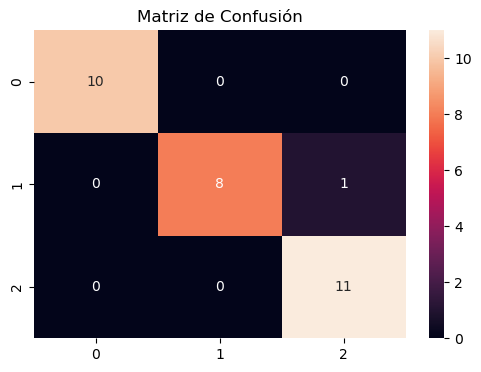

In [27]:

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.show()